## Hamoye Stage A :Introduction to Python for Machine Learning Tag - along quiz code


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read csv file with pandas
df = "/content/drive/MyDrive/HamoyeInternship/StageA/FoodBalanceSheets_E_Africa_NOFLAG.csv"
df = pd.read_csv(df, encoding='latin-1')
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [ ]:
#check for number of columns
cols = df.columns
print(cols)
print("Total columns:",len(cols))
print()
print("shape:",df.shape)

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'],
      dtype='object')
Total columns: 12

shape: (60943, 12)


In [ ]:
df.info()
# There are both numerical and categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


**Question 11**

In [53]:
# Use groupby each item based based yea 2014 and 2017
group = df.groupby("Item")[["Y2014","Y2017"]].sum()
group.head(10)

,Y2014,Y2017
Item,,
"Alcohol, Non-Food",2403.00,2348.00
Alcoholic Beverages,102410.11,95581.06
Animal Products,11935.65,11547.65
Animal fats,209460.54,269617.53
Apples and products,9499.23,10198.90
"Aquatic Animals, Others",14.55,5.92
Aquatic Plants,507.29,452.02
"Aquatic Products, Other",519.62,456.65
Bananas,53267.31,53008.82


**Question 12**

In [56]:
mean_value = df["Y2015"].mean()
standard_deviation = df["Y2015"].std()
print("Mean:",mean_value)
print("Standard deviation :",standard_deviation)

Mean: 135.23596649549626
Standard deviation : 1603.4039839425013


**Question 13**

In [58]:
#find sum of nan values in column Y2016
print("Total missing values:",df["Y2016"].isnull().sum())
print("Y2016",":",np.round(df["Y2016"].isnull().mean() * 100,4),"% misiing values")

Total missing values: 1535
Y2016 : 2.5187 % misiing values


**Question 14**

In [63]:
#Find correlation of data
df.corr()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Area Code,1.000000,-0.005159,-0.000209,0.006164,0.005472,0.005247,0.005006,0.005665
Item Code,-0.005159,1.000000,-0.024683,0.021722,0.020857,0.020109,0.021494,0.021314
Element Code,-0.000209,-0.024683,1.000000,0.024457,0.023889,0.023444,0.024254,0.024279
Y2014,0.006164,0.021722,0.024457,1.000000,0.994647,0.996081,0.995230,0.994872
Y2015,0.005472,0.020857,0.023889,0.994647,1.000000,0.995739,0.988048,0.988208
Y2016,0.005247,0.020109,0.023444,0.996081,0.995739,1.000000,0.992785,0.992757
Y2017,0.005006,0.021494,0.024254,0.995230,0.988048,0.992785,1.000000,0.998103
Y2018,0.005665,0.021314,0.024279,0.994872,0.988208,0.992757,0.998103,1.000000


**Question 15**

In [17]:
#What year has the highest sum of Import Quantity?

df.groupby("Element")[["Y2015","Y2016","Y2017","Y2018"]].sum()


,Y2015,Y2016,Y2017,Y2018
Element,,,,
Domestic supply quantity,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),10235.74,10102.77,10253.84,10258.69
Feed,225050.22,228958.65,223705.68,233489.68
Food,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),49345.13,48985.28,48690.04,49056.85
Import Quantity,267018.46,286582.78,294559.09,287997.09
Losses,155439.00,157787.00,160614.00,163902.00


**Question 16**

In [77]:
#Appply groupby on element based pn year 2014
x = df.groupby("Element")["Y2014"].sum()
print(x)

Element
Domestic supply quantity                  1996716.35
Export Quantity                            150020.64
Fat supply quantity (g/capita/day)          10225.56
Feed                                       216927.89
Food                                      1212332.49
Food supply (kcal/capita/day)              454257.00
Food supply quantity (kg/capita/yr)         49650.63
Import Quantity                            274144.48
Losses                                     153223.00
Other uses (non-food)                       78718.13
Processing                                 282923.00
Production                                1931287.75
Protein supply quantity (g/capita/day)      11836.46
Residuals                                   30149.00
Seed                                        21922.92
Stock Variation                             58749.83
Total Population - Both sexes             1031585.00
Tourist consumption                           416.00
Name: Y2014, dtype: float64


**Question 17**

Element
Domestic supply quantity                  2161192.10
Export Quantity                            181594.80
Fat supply quantity (g/capita/day)          10258.69
Feed                                       233489.68
Food                                      1303841.28
Food supply (kcal/capita/day)              455261.00
Food supply quantity (kg/capita/yr)         49056.85
Import Quantity                            287997.09
Losses                                     163902.00
Other uses (non-food)                       91300.97
Processing                                 308429.00
Production                                2075072.89
Protein supply quantity (g/capita/day)      11833.56
Residuals                                   34864.00
Seed                                        25263.14
Stock Variation                             20577.91
Total Population - Both sexes             1140605.00
Tourist consumption                            90.00
Name: Y2018, dtype: float64


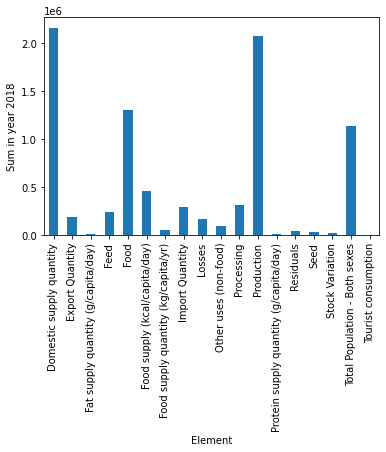

In [69]:
#groupby of element based on year 2018
x = df.groupby("Element")["Y2018"].sum()
print(x)
plt.ylabel("Sum in year 2018")
x.plot.bar()
plt.show()


**Question 18**

In [76]:
# groupby 
y = df.groupby("Element")["Y2018"].sum()
x = list(x)
#sort values
x.sort()
print("Sorted values:",x)
third_highest_value = x[2]
print("Third higghest value:",third_highest_value)
# Display dataframe to see element with third highest value
print()
print(y)


Sorted values: [90.0, 10258.69, 11833.56, 20577.91, 25263.14, 34864.0, 49056.85, 91300.97, 163902.0, 181594.8, 233489.68, 287997.09, 308429.0, 455261.0, 1140605.0, 1303841.28, 2075072.89, 2161192.1]
Third higghest value: 11833.56

Element
Domestic supply quantity                  2161192.10
Export Quantity                            181594.80
Fat supply quantity (g/capita/day)          10258.69
Feed                                       233489.68
Food                                      1303841.28
Food supply (kcal/capita/day)              455261.00
Food supply quantity (kg/capita/yr)         49056.85
Import Quantity                            287997.09
Losses                                     163902.00
Other uses (non-food)                       91300.97
Processing                                 308429.00
Production                                2075072.89
Protein supply quantity (g/capita/day)      11833.56
Residuals                                   34864.00
Seed               

**Question 19**

In [78]:
#group Area and element based on year 2018
df.groupby(["Area","Element"])["Y2018"].sum().head(40)

Area     Element                               
Algeria  Domestic supply quantity                  90023.42
         Export Quantity                             811.54
         Fat supply quantity (g/capita/day)          309.09
         Feed                                      10668.00
         Food                                      63736.33
         Food supply (kcal/capita/day)             13288.00
         Food supply quantity (kg/capita/yr)        1509.28
         Import Quantity                           36238.29
         Losses                                     7708.00
         Other uses (non-food)                      3970.08
         Processing                                 2479.00
         Production                                60766.67
         Protein supply quantity (g/capita/day)      367.28
         Residuals                                   630.00
         Seed                                        825.00
         Stock Variation                            

**Question 20**

In [81]:
# Display number of unique values in area(country) columns
print("Total countries:",len(df["Area"].unique()))

Total countries: 49
